<a href="https://colab.research.google.com/github/nikopj/SummerML/blob/master/Day1/Day1_Teacher.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Day 1: Introduction to Machine Learning
## Module Outline:
- M4: *Demo*: Ice-Breaker Data Visualization
- M5: *Demo*: Vectors and Matrices
- M6: *Demo*: Mean and Variance
- M7: *Lab*: Plotting Functions


# M4: *Demo*: Ice-Breaker Data Visualization
After checking out[ the data](https://docs.google.com/spreadsheets/d/18UkL5ydpiZBtAHllD5MqqnEp0alwuXOgl9GYYM3_A7E/edit?usp=sharing) in a spreadsheets, download it as a CSV file. Then upload the file in the Colab sidebar (under the files tab)

In [71]:
# TODO:
import pandas as pd # module for dealing with datasets
import numpy as np # module for manipulating data

df = pd.read_csv("icebreaker.csv") 
df.head(5) # print first 5 entries

,Name,Prefered Name,Grade,Country,Wake Up Time,Travel Time (mins),Mode of transportation
0,Nikola,Nikola,17,Hong Kong,8.5,20,Train
1,Student's T,Distribution,25,England,1937.0,50,Concord
2,Akshaj,Akshaj,19,India,6.5,25,Train


We'll just take the names and travel time from the dataset for now.

In [73]:
# TODO:
names        = df['Name'].values
travel_times = df['Travel Time (mins)'].values
print(travel_times)

[20 50 25]


## Plotting the data as a histogram with Matplotlib

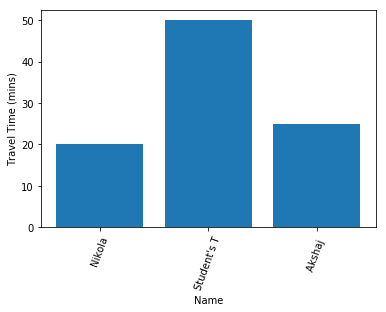

In [0]:
# TODO:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

plt.bar(names, travel_times)
plt.xticks(names, rotation=70)
plt.xlabel('Name')
plt.ylabel('Travel Time (mins)');

## Logical Indexing
We can look at specific elements of an array that meet a condition: ```>, <, >=, <=, ==, !=```

Use this to count the number of people that took trains, buses, cars, bikes or walked to class.

[ True False  True]
2
['Nikola' 'Akshaj ']
[2 0 0 0 0]


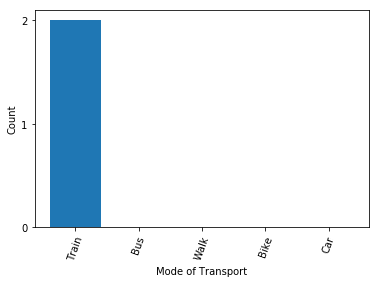

In [0]:
# TODO:
transport = df['Mode of transportation'].values

# getting logical values from comparison operation
print(transport=='Train')
# True and False are treated as 1 and 0
print(np.sum(transport=='Train'))
# actual logical indexing (indexing with booleans)
print(names[transport=='Train'])

modes = ['Train','Bus','Walk','Bike','Car']
# python shortform to make array 
count = np.array([np.sum(transport==m) for m in modes])
print(count)

plt.bar(modes, count)
plt.xticks(modes, rotation=70)
plt.xlabel('Mode of Transport')
plt.ylabel('Count')
plt.yticks(np.arange(np.max(count)+1));

# M5: *Demo*: Vectors and Matrices with Numpy

## Vectors

In [0]:
# TODO:
import numpy as np
v = np.array([1,5,2,9])
u = np.array([3,6,0,-5])

# vector addition
print("v+u = ", v+u)

# vector scaling
print("3v = ", 3*v)

# Dot-Product
print("u dot v = ", np.dot(u,v))

# Length / L2 Norm of a vector
print("sqrt(v dot v) = %.2f" % np.sqrt(np.dot(v,v)))
print("||v|| = %.2f" % np.linalg.norm(v))

v+u =  [ 4 11  2  4]
3v =  [ 3 15  6 27]
u dot v =  -12
sqrt(v dot v) = 10.54
||v|| = 10.54


## Matrices

In [0]:
# TODO:

M = np.array([ [1,9,-12], [15, -2, 0] ])
print("M = ", M.shape)
print(M)

# matrix addition
A = np.array([ [1, 1], [2, 1] ])
B = np.array([ [0, 8], [7, 11] ])
print("A+B = \n", A+B) # '\n' is the newline character

# matrix scaling
a = 5
print("aB = \n", a*B)

M =  (2, 3)
[[  1   9 -12]
 [ 15  -2   0]]
A+B = 
 [[ 1  9]
 [ 9 12]]
aB = 
 [[ 0 40]
 [35 55]]


## More About Matrices

In [0]:
# TODO:

# matrix multiplicaiton
print("shapes of A and M:", A.shape, M.shape)
C = np.matmul(A,M)
print("C = \n", C)

# matrix transpose
print("M^T = \n", np.transpose(M))

# matrix inverse
print("A^-1 = \n", np.linalg.inv(A))

shapes of A and M: (2, 2) (2, 3)
C = 
 [[ 16   7 -12]
 [ 17  16 -24]]
M^T = 
 [[  1  15]
 [  9  -2]
 [-12   0]]
A^-1 = 
 [[-1.  1.]
 [ 2. -1.]]


## Vectors and Matrices

In [0]:
# TODO:

v = np.array([1,5,2,9])

# v
print("v", v.shape, " = ", v)

# row vector v
v = v.reshape(1,-1) # shape -1 in np.reshape means value is infered
print("row vector v", v.shape, " = ",  v) 

# column vector v
v = v.reshape(-1,1)
print("col vector v", v.shape, " = \n",  v) 

# dot product as matrix multiplication
print("v dot v =", np.matmul(np.transpose(v), v))

v (4,)  =  [1 5 2 9]
row vector v (1, 4)  =  [[1 5 2 9]]
col vector v (4, 1)  = 
 [[1]
 [5]
 [2]
 [9]]
v dot v = [[111]]


## Manipulating our IceBreaker Data
It is often useful to put our feature vectors into a matrix

In [0]:
# TODO:

# we can stack the vectors we've already extracted from the dataframe
A = np.hstack([names.reshape(-1,1),
               wakeup_times.reshape(-1,1),
               travel_times.reshape(-1,1),
               transport.reshape(-1,1)
              ])
print(A)

# or we can get the matrix that pandas returns automatically and slice it
A = df.values
print("\n",A)

# slicing the matrix (choosing specific columns)
A = A[:,[0,4,5,6]]
print("\n",A)

# chosing a specific row
print("\n",A[2,:])

[['Nikola' 8.5 20 'Train']
 ["Student's T" 1937.0 50 'Concord']
 ['Akshaj ' 6.5 25 'Train']]

 [['Nikola' 'Nikola' 17 'Hong Kong' 8.5 20 'Train']
 ["Student's T" 'Distribution' 25 'England' 1937.0 50 'Concord']
 ['Akshaj ' 'Akshaj' 19 'India' 6.5 25 'Train']]

 [['Nikola' 8.5 20 'Train']
 ["Student's T" 1937.0 50 'Concord']
 ['Akshaj ' 6.5 25 'Train']]

 ['Akshaj ' 6.5 25 'Train']


# M6: *Demo*: Sample Mean and Variance


## Lecture Demo calculations:
### Using for-loops:

In [0]:
# TODO:
x = np.array([3.6, 4.0, 3.7, 3.75, 3.9, 4.0, 3.65])
N = len(x)

xbar = 0;
for i in range(len(x)):
  xbar = xbar + x[i]
xbar = xbar/N

xvar = 0;
for i in range(len(x)):
  xvar = xvar + (x[i]-xbar)**2
xvar = xvar/N

def print_func(mean,var):
  print("mean: %.2f" % mean)
  print("variance: %.2f" % var)
  
print_func(xbar,xvar)

mean: 3.80
variance: 0.02


### Using Numpy functions

In [0]:
# TODO:
mean = np.mean(x)
var = np.var(x)

print_func(mean,var)

mean: 3.80
variance: 0.02


## Stats on our Data
Now, looking back at our icebreaker data. What are the statistics on our classes wakeup time? Travel time? Can we visualize how they're related? What kind of plot should we use?

mean: 650.67
variance: 827327.39
mean: 31.67
variance: 172.22


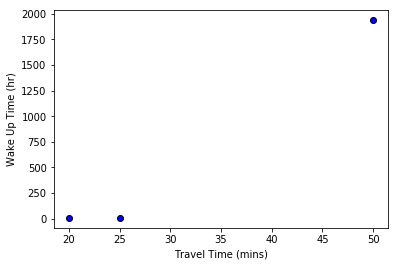

In [0]:
# TODO: 

wakeup_times = df['Wake Up Time'].values

print_func(np.mean(wakeup_times), np.var(wakeup_times))
print_func(np.mean(travel_times), np.var(travel_times))

# what happens if we don't use the 'ob' options when plotting?
plt.plot(travel_times, wakeup_times, 'ob', markeredgecolor='black')
plt.xlabel('Travel Time (mins)')
plt.ylabel('Wake Up Time (hr)');

# M7: *Lab*: Plotting Functions


- This lab requires you to search for the documentation of python, numpy, and matplotlib functions
- Use numpy to generate the following functions:
  - Sine-wave
  - Polynomial
  - Bell-curve (a.k.a Normal or Gaussian distribution)
- Plot the graphs using matplotlib
- *Hints*: 
  - Pick an interval to plot over first, ex. [-1,1]. 
  - Look into ```np.pi```, ```np.sin()```, ```np.exp()```, and ```np.linspace()``` (ie. google for the documentation of these functions)

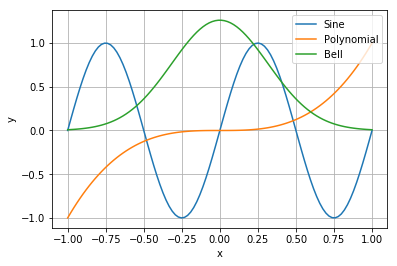

In [0]:
# TODO:
import numpy as np

x = np.linspace(-1,1,100)

y1 = np.sin(2*np.pi*x)

y2 = x**3

y3 = np.exp(-x**2/(2*.1)) / np.sqrt(2*np.pi*.1)

plt.plot(x,y1,x,y2,x,y3)
plt.xlabel('x')
plt.ylabel('y')
plt.legend(['Sine','Polynomial','Bell'])
plt.grid();
plt.savefig("funcs.png")

## Mean and Variance
What are the mean and variance of your functions over the plotted range?

Compute the answers in code. Talk with your neighbors about why this is the case.


In [0]:
# TODO:

for y in [y1,y2,y3]:
  print_func(np.mean(y), np.var(y))

mean: -0.00
variance: 0.49
mean: 0.00
variance: 0.15
mean: 0.49
variance: 0.20
